In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# **🌟 Exercise 1 : Understanding the problem and Data Collection**

In [4]:
file = pd.read_csv("/content/drive/MyDrive/GENAI/Week4/Day2/diabetes_prediction_dataset.csv")
df = pd.DataFrame(file)
df.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
df.drop_duplicates(inplace=True)
df.shape

(96146, 9)

On supprime les lignes présentes en double dans le dataset

In [6]:
df.isna().mean() * 100

,0
gender,0.0
age,0.0
hypertension,0.0
heart_disease,0.0
smoking_history,0.0
bmi,0.0
HbA1c_level,0.0
blood_glucose_level,0.0
diabetes,0.0


Le dataset ne comporte pas de valeurs nuls

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


In [8]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [9]:
numericals = df.select_dtypes(include=["float","int"]).columns
numericals = numericals.drop(["diabetes", 'hypertension', 'heart_disease'])
numericals

Index(['age', 'bmi', 'HbA1c_level', 'blood_glucose_level'], dtype='object')

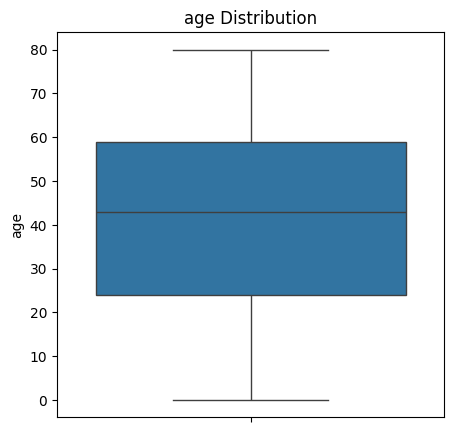

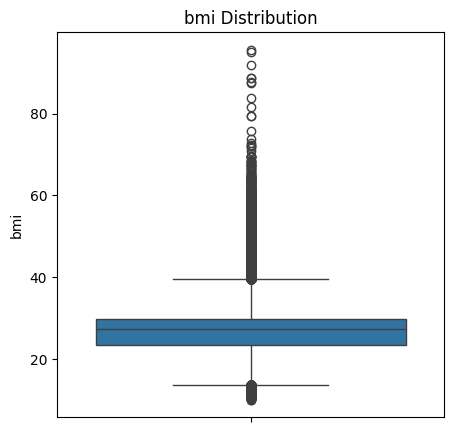

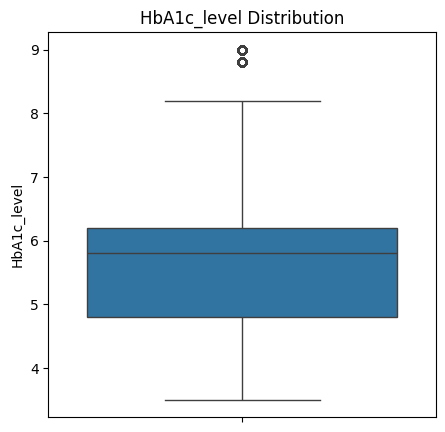

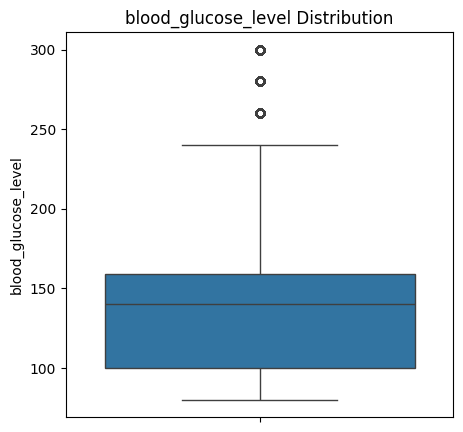

In [10]:
for col in numericals:
  plt.figure(figsize=(5, 5))
  plt.title(f"{col} Distribution")
  sns.boxplot(df[col])
  plt.show()

On observe que la feature BMI comporte un nombre sifnificatif d'outliers qu'on supprime par la suite.

In [11]:
for col in numericals:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

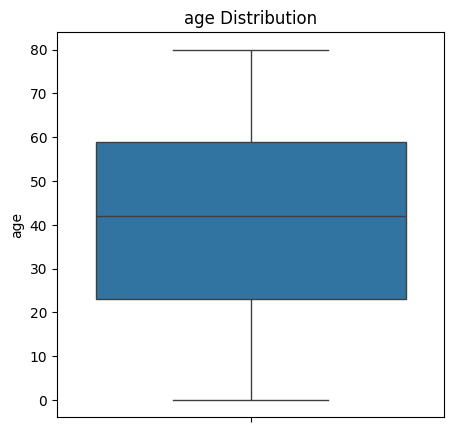

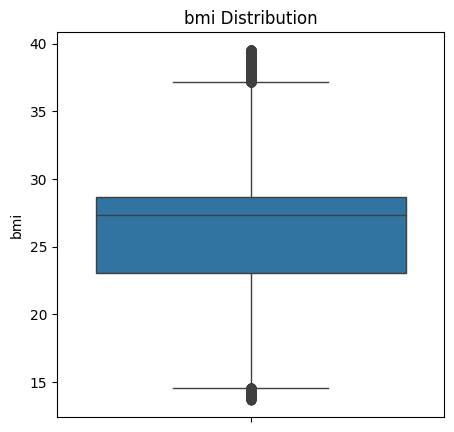

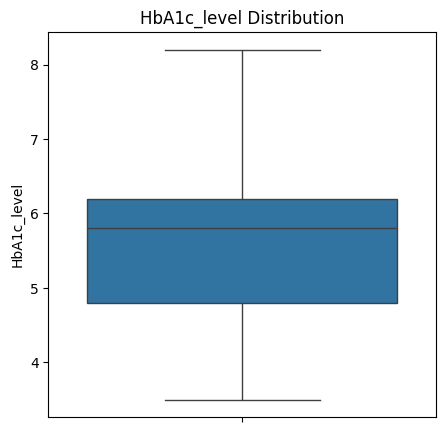

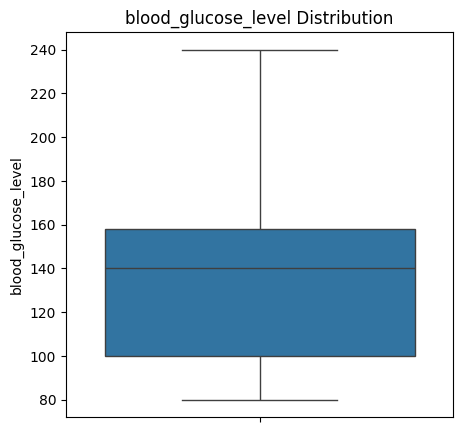

In [12]:
for col in numericals:
  plt.figure(figsize=(5, 5))
  plt.title(f"{col} Distribution")
  sns.boxplot(df[col])
  plt.show()

Les différentes features présentent maintenant des valeurs situées dans une plage raisonnable, après exclusion des outliers.

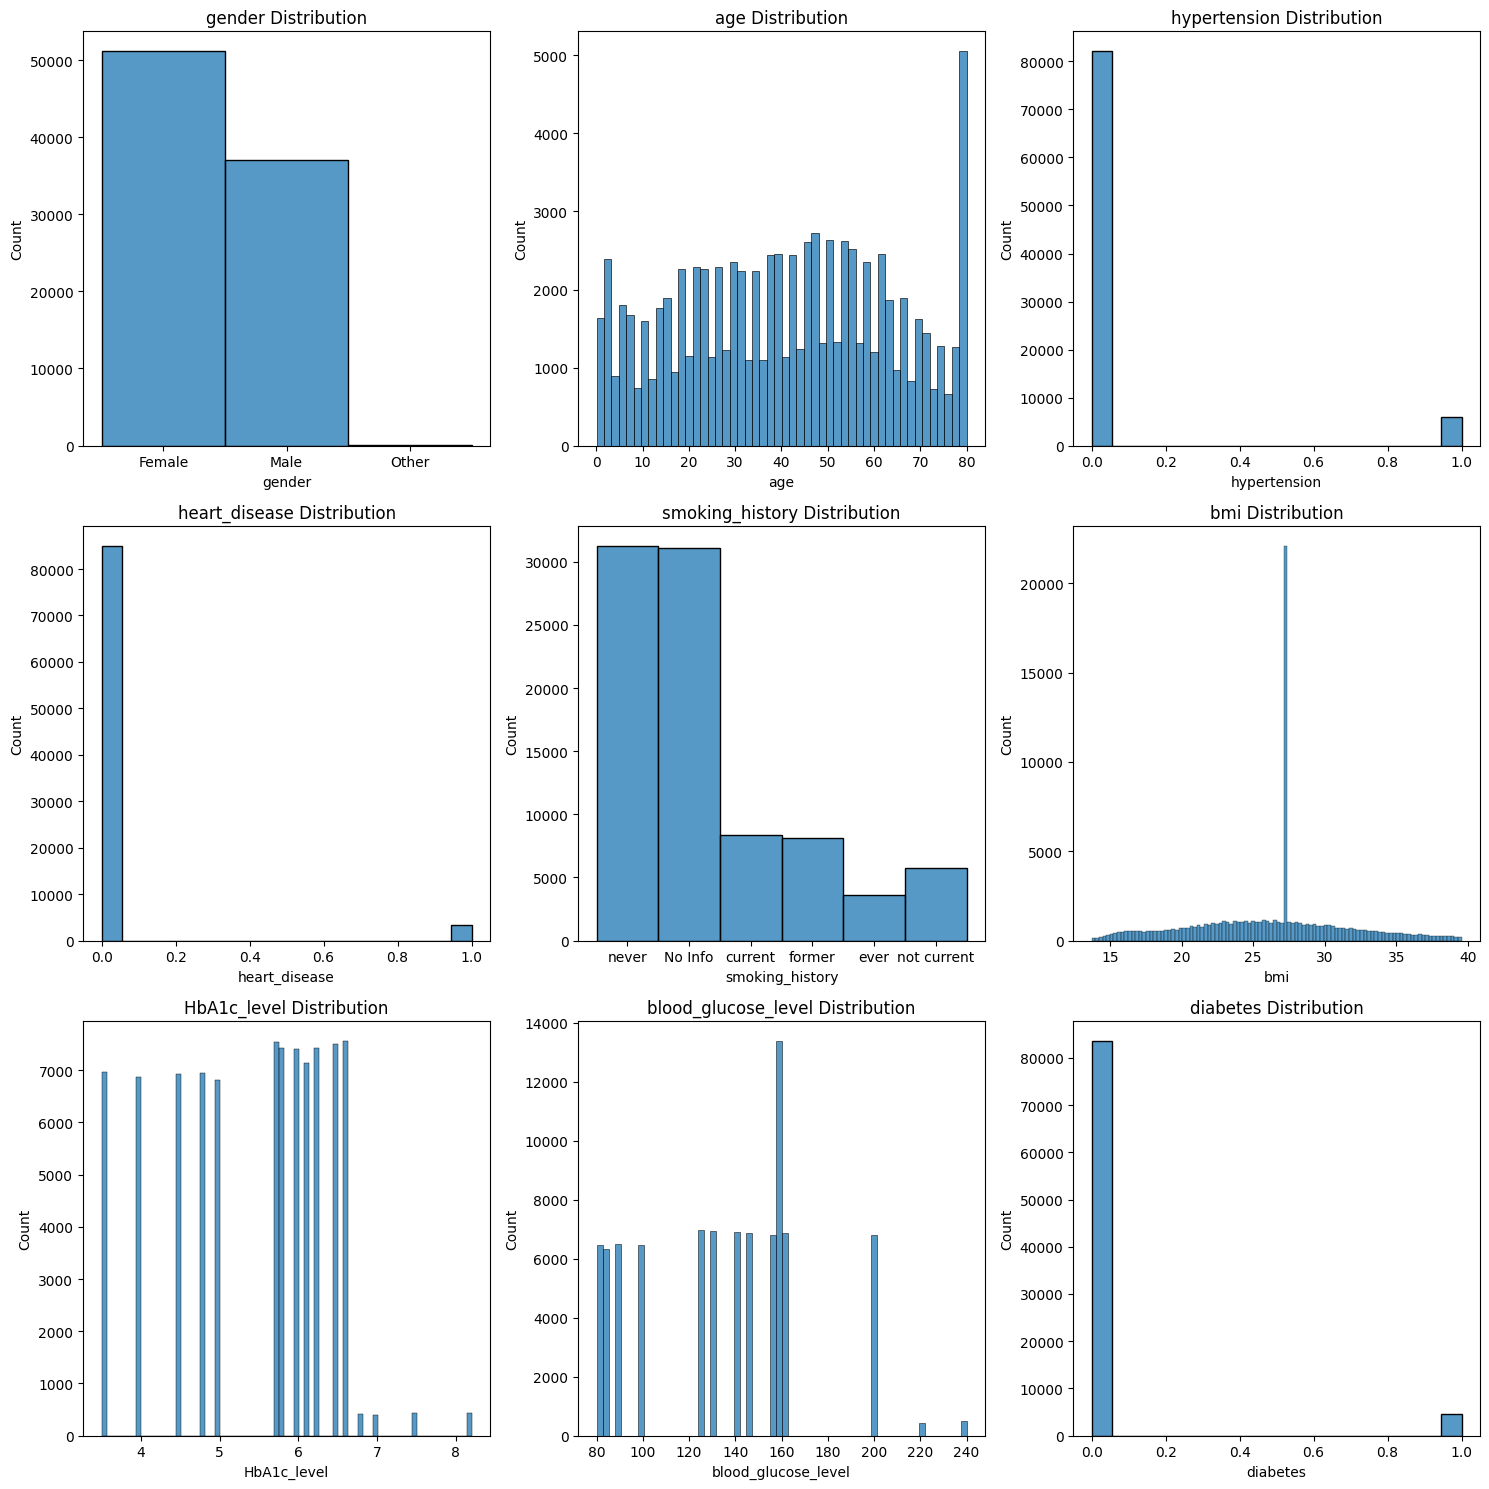

In [13]:
n_cols = len(df.columns)
n_cols_per_row = 3
n_rows = (n_cols + n_cols_per_row - 1) // n_cols_per_row

fig, axes = plt.subplots(n_rows, n_cols_per_row, figsize=(5 * n_cols_per_row, 5 * n_rows))

axes = axes.flatten()

for i, col in enumerate(df.columns):
    sns.histplot(df[col], ax=axes[i])
    axes[i].set_title(f"{col} Distribution")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [14]:
df["bmi"].value_counts()

,count
bmi,
27.32,21136
23.00,102
27.12,100
22.40,99
24.96,97
...,...
38.34,1
14.08,1
13.77,1


In [15]:
df["bmi"] = df["bmi"].replace(27.32, np.nan)
df.dropna(inplace=True)

Cette valeur de BMI est supprimée en raison de sa fréquence anormalement élevée dans la distribution, probablement liée à un remplacement excessif des valeurs manquantes par cette même valeur.

In [16]:
df["diabetes"].value_counts()

,count
diabetes,
0,63425
1,3634


Il y a 3634 personnes qui ont le diabete contre 63425 qui ne l'ont pas

In [17]:
df2 = df.copy()
df2.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0


On encode les données catégorielles et on normalise les données numériques afin de les rendre utilisable par un modèle de machine learning

In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df2["gender"] = le.fit_transform(df2["gender"])
df2["smoking_history"] = le.fit_transform(df2["smoking_history"])

In [19]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df2[numericals] = ss.fit_transform(df2[numericals])

In [20]:
df2.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,1.733346,0,1,4,-0.135769,1.143662,0.153669,0
3,0,-0.188602,0,0,1,-0.428238,-0.463613,0.578706,0
4,1,1.558624,1,1,1,-0.984601,-0.664522,0.578706,0
6,0,0.160843,0,0,4,-1.124112,1.043207,1.853817,1
7,0,1.689665,0,0,0,-0.359323,0.239570,-1.404800,0


On split les données en données de test et d'entrainement

In [21]:
from sklearn.model_selection import train_test_split
X = df2.drop("diabetes", axis=1)
y = df2["diabetes"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **🌟 Exercise 2 : Model Picking and Standardization**

Pour ce type de problème, des algorithmes de classification comme la logistic regression, le Gradient Boosting, le XGBoost ou la Random Forest sont particulièrement adaptés, car ils permettent de prédire efficacement si une personne est susceptible ou non de développer le diabète à partir des différentes variables explicatives.

# **🌟 Exercise 3 : Model Training**

On crée un modèle de logistic regression ainsi qu'un modèle de gradient boosting qu'on entraine sur nos données pour prédire si oui ou non une personne à le diabète.

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

log_reg = LogisticRegression()
gb_clf = GradientBoostingClassifier()

log_reg.fit(x_train, y_train)
gb_clf.fit(x_train, y_train)

y_pred_log = log_reg.predict(x_test)
y_pred_gb = gb_clf.predict(x_test)

# **🌟 Exercise 4 : Evaluation Metrics**

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

metrics = {
    "Accuracy" : [accuracy_score(y_test, y_pred_log), accuracy_score(y_test, y_pred_gb)],
    "Precision" : [precision_score(y_test, y_pred_log), precision_score(y_test, y_pred_gb)],
    "Recall" : [recall_score(y_test, y_pred_log), recall_score(y_test, y_pred_gb)],
    "F1 Score" : [f1_score(y_test, y_pred_log), f1_score(y_test, y_pred_gb)]
}

metrics = pd.DataFrame(metrics, index=["Logistic regression", "Gradient boosting"]).T
metrics

,Logistic regression,Gradient boosting
Accuracy,0.961676,0.974948
Precision,0.723288,0.962060
Recall,0.389956,0.524372
F1 Score,0.506718,0.678776


Le modèle de régression logistique a tendance à prédire peu de cas positifs, ce qui explique son recall très bas. Et donc par conséquent détecte mal les diabétiques.

Le Gradient Boosting détecte plus de cas positifs et les détecte avec plus de précision.

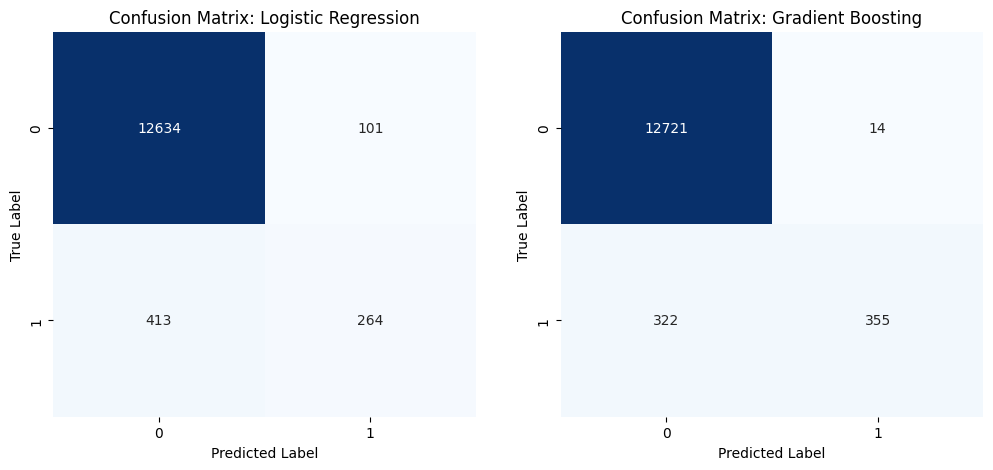

In [24]:
from sklearn.metrics import confusion_matrix

cm_log_reg = confusion_matrix(y_test, y_pred_log)
cm_gb_clf = confusion_matrix(y_test, y_pred_gb)


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix: Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 2, 2)
sns.heatmap(cm_gb_clf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix: Gradient Boosting')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Dans notre cas il est préférable d'utiliser le gradient boosting car il détecte plus de True positifs et avec moins faux négatifs que la logistic regression.

# **🌟 Exercise 5 : Visualizing the performance of our model**

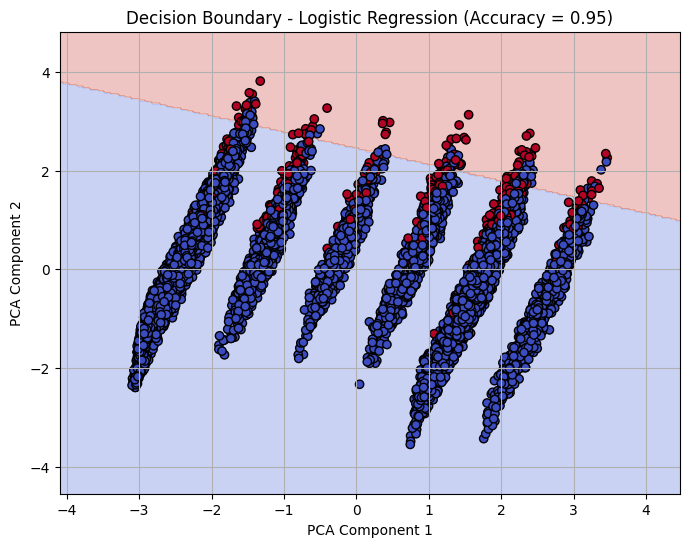

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

log_reg_2d = LogisticRegression()
log_reg_2d.fit(x_train_pca, y_train)

y_pred_2d = log_reg_2d.predict(x_test_pca)
acc = accuracy_score(y_test, y_pred_2d)

x_min, x_max = x_test_pca[:, 0].min() - 1, x_test_pca[:, 0].max() + 1
y_min, y_max = x_test_pca[:, 1].min() - 1, x_test_pca[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

Z = log_reg_2d.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(x_test_pca[:, 0], x_test_pca[:, 1], c=y_test, edgecolor='k', cmap=plt.cm.coolwarm)

plt.title(f"Decision Boundary - Logistic Regression (Accuracy = {acc:.2f})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

# **🌟 Exercise 6 : ROC Curve**

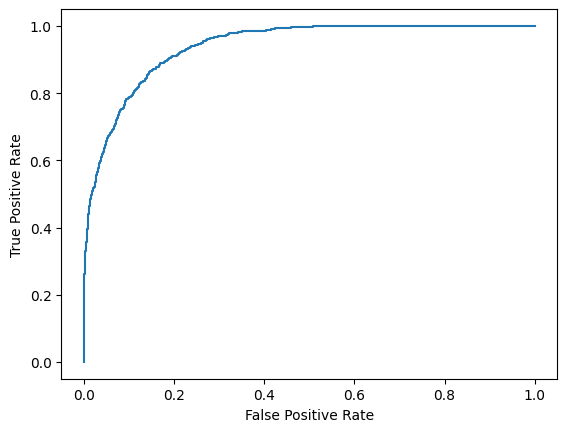

In [33]:
from sklearn import metrics

y_pred_proba = log_reg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()